# Analyzing Tech Salaries in Different Countries: Investigating Influential Factors

## Introduction
This research project explores variations and factors affecting tech salaries between different countries, leveraging a dataset from results of a 2016 Hacker News survey about salaries and bonuses. 

The data is obtained from [Kaggle Notebook](https://www.kaggle.com/datasets/thedevastator/know-your-worth-tech-salaries-in-2016), original source by Brandon Telle [[source]](https://data.world/brandon-telle/2016-hacker-news-salary-survey-results). This dataset includes details about salaries in the tech industry in 2016, including information such as employer names, locations, job titles, experience levels, and compensation details. 

The primary focus of this reserach is on analyzing the disparities in salaries across different locations internationally and understanding the potential factors influencing these variations. The research question guiding this investigation is: "How do salaries in the tech industry vary between different countries, and what factors contribute to these variations?" By analyzing this dataset, I aim to uncover patterns and correlations between salary and associated variables that can contribute to a more nuanced understanding of compensation trends within the tech sector.

Dependent variable (Y): Annual base pay is set to be the dependent variable. 

- *annual_base_pay*: The annual base pay is the fixed yearly salary, excluding any additional bonuses or benefits. It serves as the dependent variable in my analysis because it representes the core earnings of the respondent and is a key metric in understanding the global tech salary landscape. This allows me to analyze salary trends and factors influencing salary disparities.

Independent variables (X): The following variables are set to be the independent variables: job category, employer name, and job title. These chosen independent variables collectively provide a comprehensive view of factors influencing annual base pay in the tech industry, directly addressing my research question on the variations in salaries between cities and the underlying factors contributing to these variations.
- *job_title_category*: The nature of the job, whether it's software, data, engineering, or management, can influence the salary level. Categorizing job roles helps examine how distinct fields in the tech industry contribute to salary variations. This variable is crucial for analysis as I seek to understand the impact of job categories on annual base pay.
- *employer_name*: The reputation and financial capabilities of the employer can influence salary levels. Larger, more established companies might offer higher salaries compared to smaller startups. Including employer_name as an independent variable allows me to explore the relationship between the reputation or size of the employer and the annual base pay received by the respondents. This adds a corporate dimension to my analysis, investigating how company reputation and stature affect compensation.
- *job_title*: The specific role held can directly impact salary levels as different job positions often come with distinct responsibilities and skill requirements. Analyzing the impact of job titles on annual base pay helps uncover the hierarchical and positional factors contributing to salary variations in the tech sector. By considering job_title as an independent variable, I aim to compare salaries between equivalent positions across different cities, which will allow for a more detailed breakdown of salary differences.
- *total_experience_years*: The total number of years of professional experience the respondent has accumulated is an expected influencing factor on salary because individuals with more experience tend to command higher pay due to their acquired skills, expertise, and experience in the industry. Examining the experience level can reflect the market value of an individual's expertise in different locations, providing a more comprehensive understanding of the dynamics influencing compensation in the tech industry.
- *annual_bonus*: Annual bonus captures the impact of variable compensation on the overall annual salary of the respondent. Analyzing the relationship between annual bonuses and annual base pay allows for a more holistic understanding of the factors influencing salary variations in the tech industry. It helps in assessing the difference individuals with similar base salaries receive in annual bonus, providing insights into the reward structures and performance-based incentives prevalent in different countries.

## Data Cleaning

In [19]:
import numpy as np
import pandas as pd

In [4]:
#load in dataset
df = pd.read_csv("/Users/macychen/ECO225Project/Data/salaries_clean.csv", low_memory=False)
df

,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,3,6,netapp,waltham,MA,US,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,4,12,apple,cupertino,CA,US,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,1650,3289,sparkfun electronics,"boulder, co",CO,US,40.02,-105.25,junior software developer,Software,Junior,1.0,0.5,60500.0,0.0,800.0,0,NaN,3/23/16 8:24
1651,1651,3290,intel,europe,NaN,NaN,NaN,NaN,staff software enginer,Software,NaN,6.0,4.0,164000.0,0.0,20000.0,30000 USD,NaN,3/23/16 8:27
1652,1652,3293,$2bn valuation tech company,new york city,NY,US,NaN,NaN,sr. frontend eng,Web,Senior,7.0,1.0,150000.0,0.0,0.0,0,NaN,3/23/16 8:41
1653,1653,3294,of maryland,"college park, md",MD,US,38.99,-76.93,scientific programmer (faculty research assist...,Applied Science,NaN,5.0,1.0,75000.0,NaN,NaN,NaN,NaN,3/23/16 8:43


In [21]:
#drop unneeded columns
cleaned_df = df.drop(columns=['index', "salary_id", "job_title_rank", "employer_experience_years", "signing_bonus", "stock_value_bonus", "comments", "submitted_at"])

#display percentage of missing data (null value) in each column: number of NaNs/total number of index
round(100*(cleaned_df.isnull().sum()/len(cleaned_df.index)), 2)

employer_name              0.24
location_name              0.00
location_state            30.33
location_country           4.59
location_latitude         52.15
location_longitude        52.15
job_title                  0.00
job_title_category         0.00
total_experience_years     2.84
annual_base_pay            0.24
annual_bonus              19.27
dtype: float64

In [51]:
#drop rows that have missing values for annual base pay, employer, total_experience_years and location_country
cleaned_df.dropna(subset=['employer_name', 'annual_base_pay', 'total_experience_years', 'location_country'], 
              inplace=True)
cleaned_df.reset_index(drop=True, inplace=True)

#replace missing values in annual_bonus with 0
cleaned_df['annual_bonus'] = cleaned_df['annual_bonus'].fillna(value=0)
cleaned_df

,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,annual_base_pay,annual_bonus
0,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,13.0,125000.0,0.0
1,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,15.0,65000.0,5000.0
2,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,4.0,86000.0,6000.0
3,netapp,waltham,MA,US,NaN,NaN,mts,Other,4.0,105000.0,8500.0
4,apple,cupertino,CA,US,NaN,NaN,software engineer,Software,4.0,110000.0,7000.0
...,...,...,...,...,...,...,...,...,...,...,...
1501,mainz brady group - contractor at nike,"beaverton, or",OR,US,45.49,-122.80,front-end developer,Web,2.0,50.0,0.0
1502,sparkfun electronics,"boulder, co",CO,US,40.02,-105.25,junior software developer,Software,1.0,60500.0,800.0
1503,$2bn valuation tech company,new york city,NY,US,NaN,NaN,sr. frontend eng,Web,7.0,150000.0,0.0
1504,of maryland,"college park, md",MD,US,38.99,-76.93,scientific programmer (faculty research assist...,Applied Science,5.0,75000.0,0.0


## Summary Statistics Tables

In [52]:
cleaned_df.describe()

,location_latitude,location_longitude,total_experience_years,annual_base_pay,annual_bonus
count,764.000000,764.000000,1506.000000,1.506000e+03,1506.000000
mean,37.711688,-64.111741,6.667052,2.428492e+05,8164.514608
std,16.741892,67.676896,5.302761,4.044741e+06,39757.449252
min,-41.000000,-123.270000,0.000000,0.000000e+00,0.000000
25%,37.410000,-104.825000,3.000000,6.100000e+04,0.000000
50%,38.625000,-95.000000,5.000000,9.800000e+04,0.000000
75%,45.440000,-62.500000,10.000000,1.300000e+05,6500.000000
max,65.000000,174.000000,40.000000,1.560000e+08,1000000.000000


In [53]:
cleaned_df.describe(include=['object'])

,employer_name,location_name,location_state,location_country,job_title,job_title_category
count,1506,1506,1090,1506,1506,1506
unique,991,568,50,65,614,8
top,google,san francisco,CA,US,software engineer,Software
freq,55,139,403,1054,285,813


In [54]:
cleaned_df['location_country'].value_counts()

location_country
US    1054
UK      69
CA      59
DE      46
IN      33
      ... 
IS       1
PE       1
BG       1
BA       1
AT       1
Name: count, Length: 65, dtype: int64

## Plots, Histograms, Figures

In [55]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

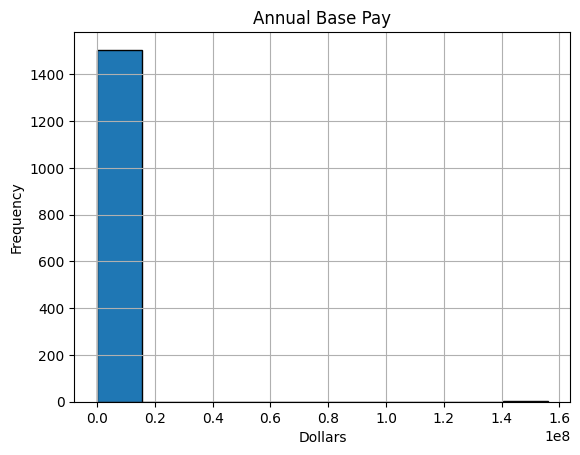

In [56]:
cleaned_df['annual_base_pay'].hist(edgecolor='black')
plt.title('Annual Base Pay')
plt.xlabel('Dollars')
plt.ylabel('Frequency')

<AxesSubplot: title={'center': 'annual_base_pay'}, xlabel='job_title_category'>

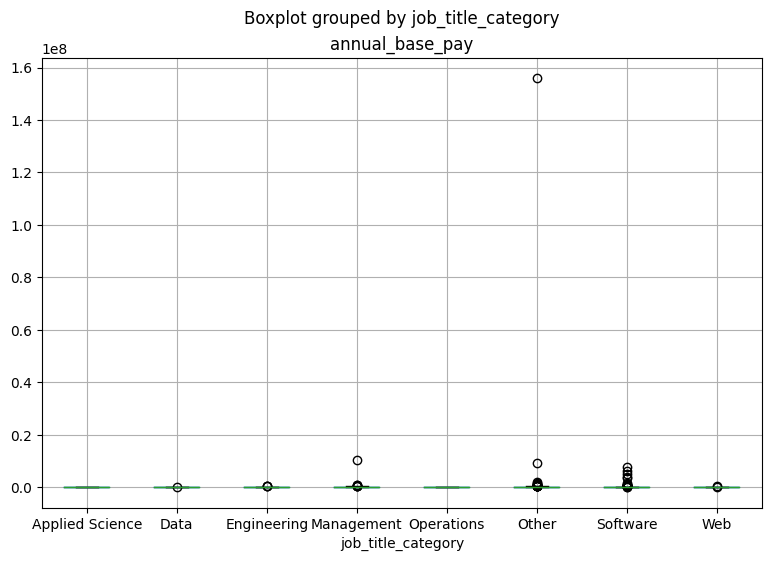

In [57]:
cleaned_df.boxplot('annual_base_pay', by='job_title_category', widths=0.5, figsize=(9, 6))

Text(0.5, 1.0, 'Annual Base Pay vs. Total Experience')

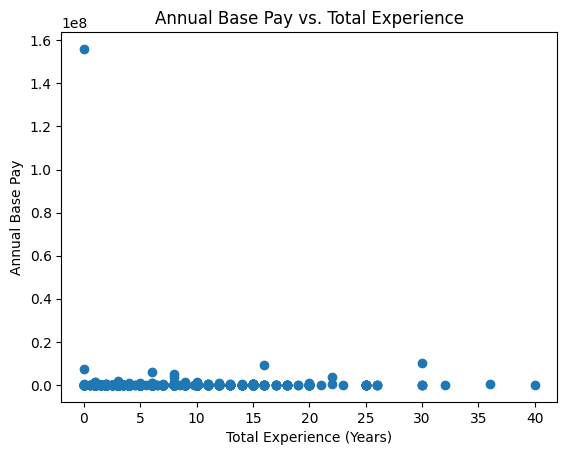

In [58]:
x = cleaned_df['total_experience_years']
y = cleaned_df['annual_base_pay']

plt.scatter(x, y)
plt.xlabel('Total Experience (Years)')
plt.ylabel('Annual Base Pay')
plt.title('Annual Base Pay vs. Total Experience')

Text(0.5, 1.0, 'Average Salary by Experience Group')

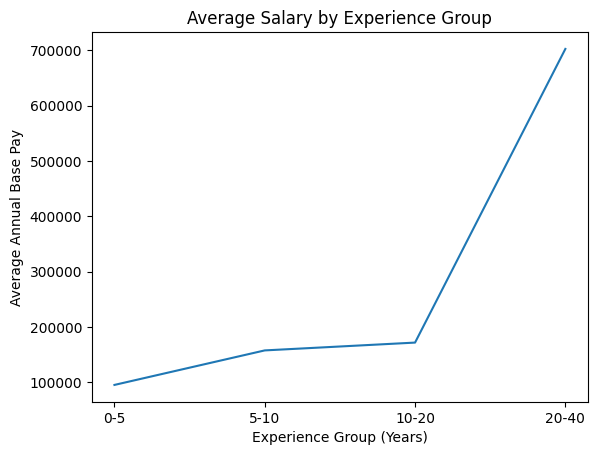

In [83]:
bins = [0, 5, 10, 20, 40]
exp_grouped_df = cleaned_df.copy()
exp_grouped_df['experience_group'] = pd.cut(cleaned_df['total_experience_years'], bins=bins, 
                                                   labels=['0-5', '5-10', '10-20', '20-40'])

avg_pay_grouped = exp_grouped_df.groupby('experience_group', observed=True)['annual_base_pay'].mean().reset_index()

plt.plot(avg_pay_grouped['experience_group'], avg_pay_grouped['annual_base_pay'])
plt.xlabel('Experience Group (Years)')
plt.ylabel('Average Annual Base Pay')
plt.title('Average Salary by Experience Group')